In [5]:
from alphaengine import loaders, stats, transforms
import numpy as np
import talib as ta
from itertools import product
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt
import csv
from datetime import datetime

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
aapl = loaders.FileInstrument('../data/aapl.csv')

In [54]:
z_close = transforms.z_score(aapl['close'], window_size=50)

In [55]:
strats = transforms.generate_strategies(z_close)

In [56]:
v = stats.vectorized_volatility_efficiency(aapl['forward_returns'], strats)

/Users/stu/PycharmProjects/AlphaEngine/alphaengine/stats.py:117: RuntimeWarning: invalid value encountered in true_divide
  vol_effs = strat_v_bh / (np.sum(_strategy.astype(int), axis=1) / _strategy.shape[1])


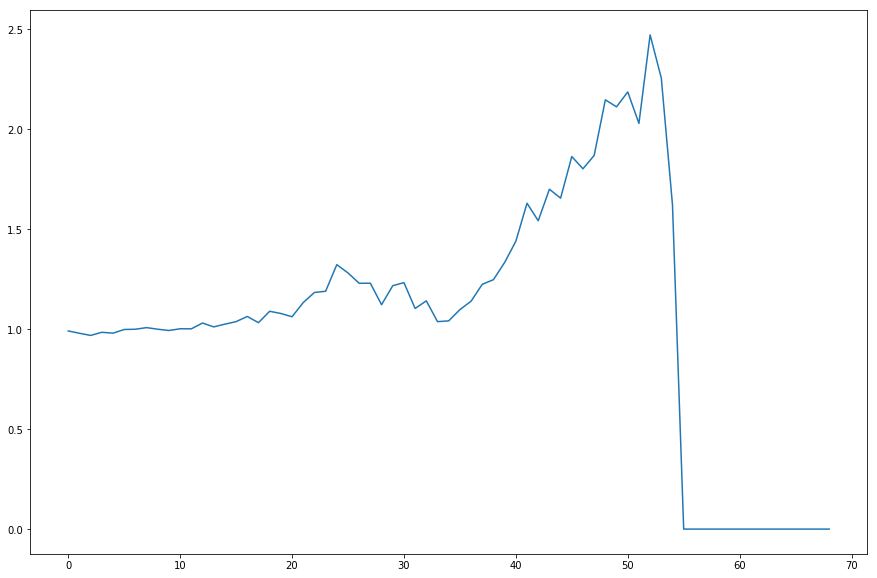

In [57]:
plt.plot(v)

In [58]:
best_strat = strats[np.argmax(v)]

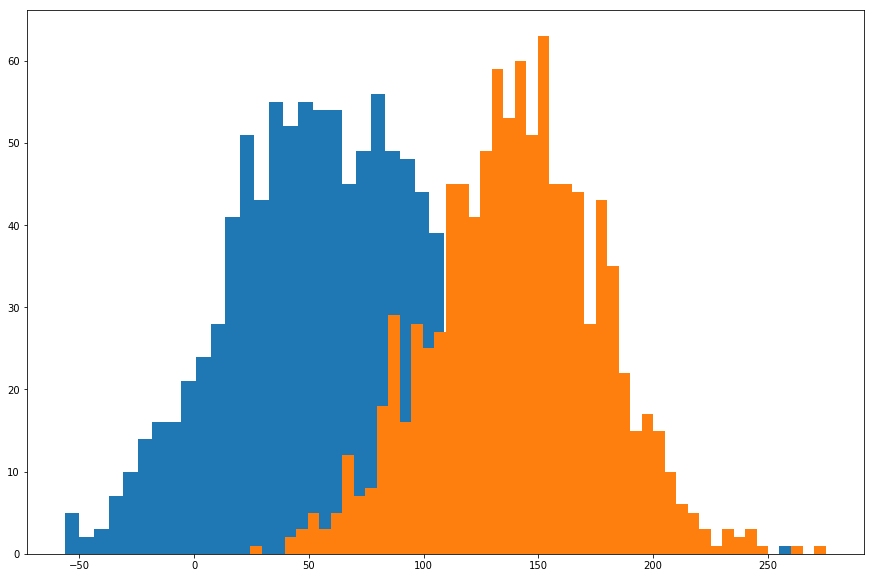

In [59]:
stats.plot_strat_monte_carlo(aapl, best_strat)

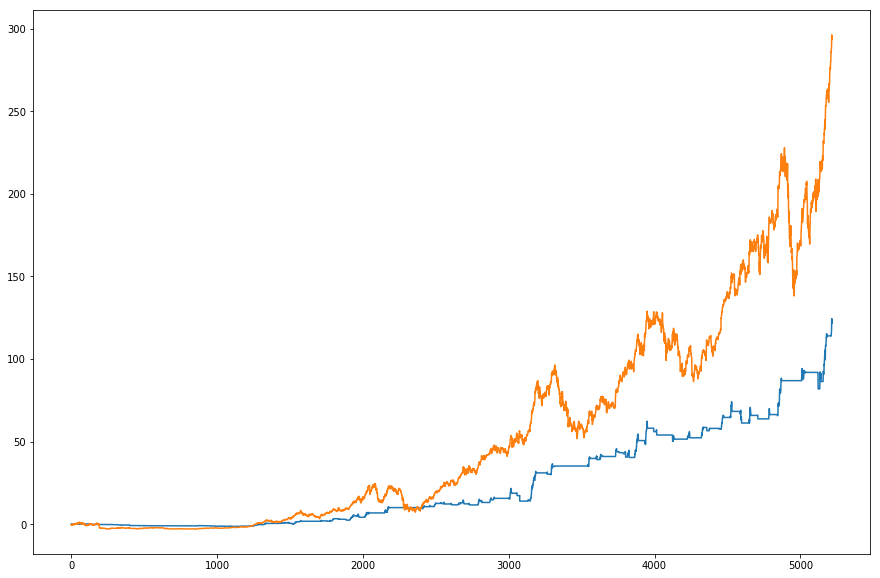

In [60]:
performance = best_strat.astype(int) * aapl['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(aapl['forward_returns']))

In [61]:
a, b, c = ta.MACD(aapl['close'])

In [64]:
transforms.z_score(c, window_size=50)
strats = transforms.generate_strategies(z_close)
v = stats.vectorized_volatility_efficiency(aapl['forward_returns'], strats)

/Users/stu/PycharmProjects/AlphaEngine/alphaengine/stats.py:117: RuntimeWarning: invalid value encountered in true_divide
  vol_effs = strat_v_bh / (np.sum(_strategy.astype(int), axis=1) / _strategy.shape[1])


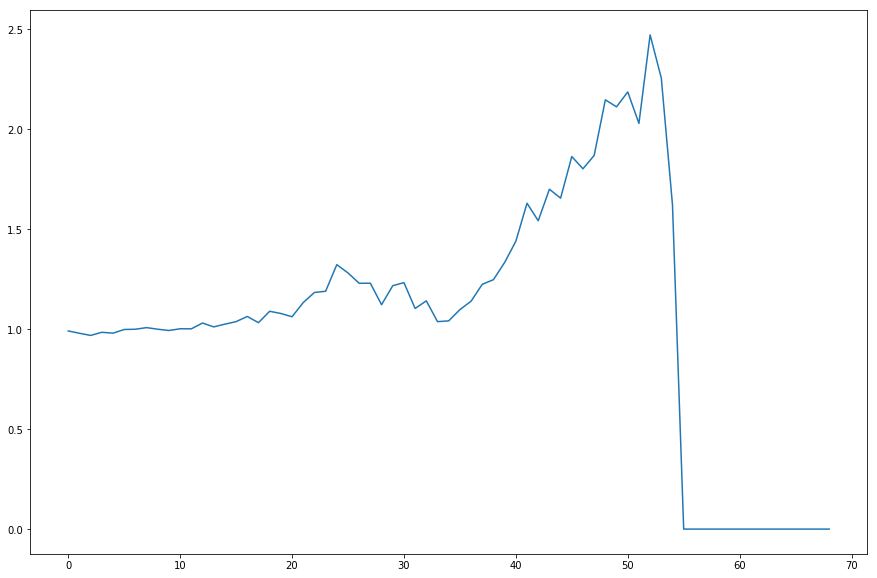

In [65]:
plt.plot(v)

In [87]:
def explore_feature(feature, returns, window_size=100):
    z = transforms.z_score(feature, window_size=window_size)
    strats = transforms.generate_strategies(z)
    v = stats.vectorized_volatility_efficiency(returns, strats)
    return v, strats

In [88]:
vv, ss = explore_feature(b, aapl['forward_returns'])

In [89]:
v, s = explore_feature(c, aapl['forward_returns'])

In [100]:
v3, s3 = explore_feature(aapl['close'], aapl['forward_returns'])

In [96]:
v4, s4 = explore_feature(ta.RSI(aapl['close']), aapl['forward_returns'])

In [91]:
s[np.argmax(v)]

array([False, False, False, ...,  True,  True,  True])

In [103]:
mixed = ss[np.argmax(vv)] + s4[np.argmax(v4)]# + s3[np.argmax(v3)]

In [342]:
performance = mixed.astype(int) * aapl['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(aapl['forward_returns']))

ValueError: operands could not be broadcast together with shapes (3952,) (5219,) 

In [343]:
msft = loaders.FileInstrument('../../../Developer/Data/prices/AMEX/GLD.csv')

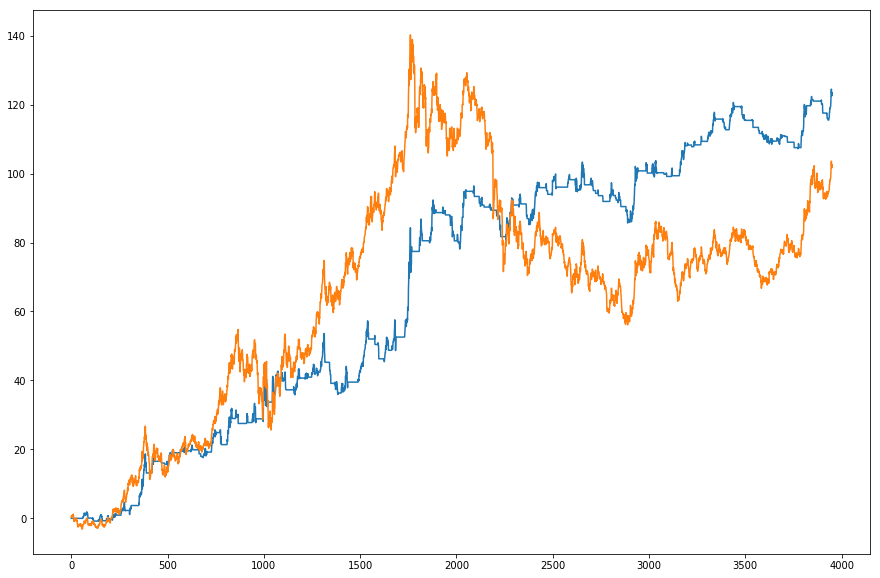

In [344]:
a, b, c = ta.MACD(msft['close'])
v1, s1 = explore_feature(b, msft['forward_returns'], window_size=50)
v4, s4 = explore_feature(ta.RSI(msft['close']), msft['forward_returns'], window_size=30)
mixed = s4[np.argmax(v4)] + s1[np.argmax(v1)]
performance = mixed.astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))


In [345]:
rsis = [ta.RSI(msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]

In [346]:
results = [explore_feature(rsi, msft['forward_returns'], window_size=30) for rsi in rsis]

In [347]:
z = [result[1][np.argmax(result[0])] for result in results]

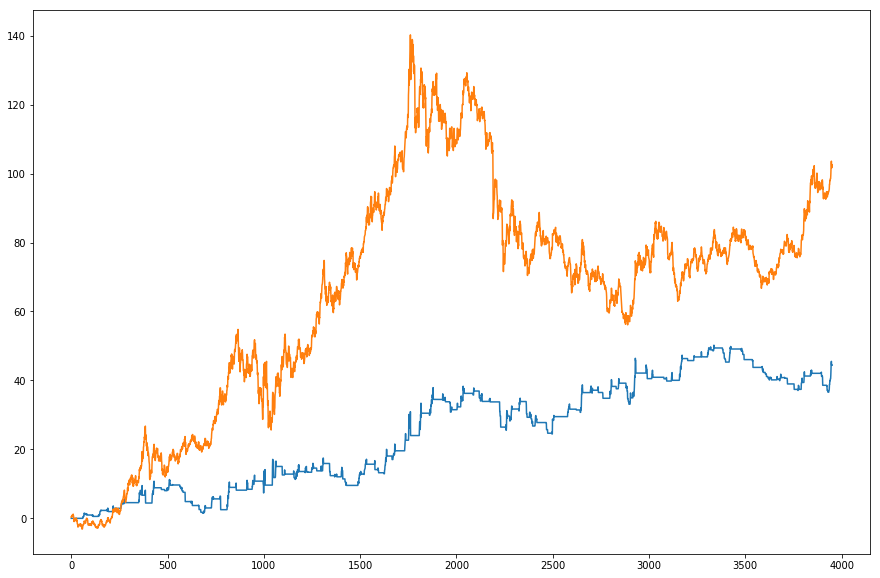

In [348]:
performance = z[0].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

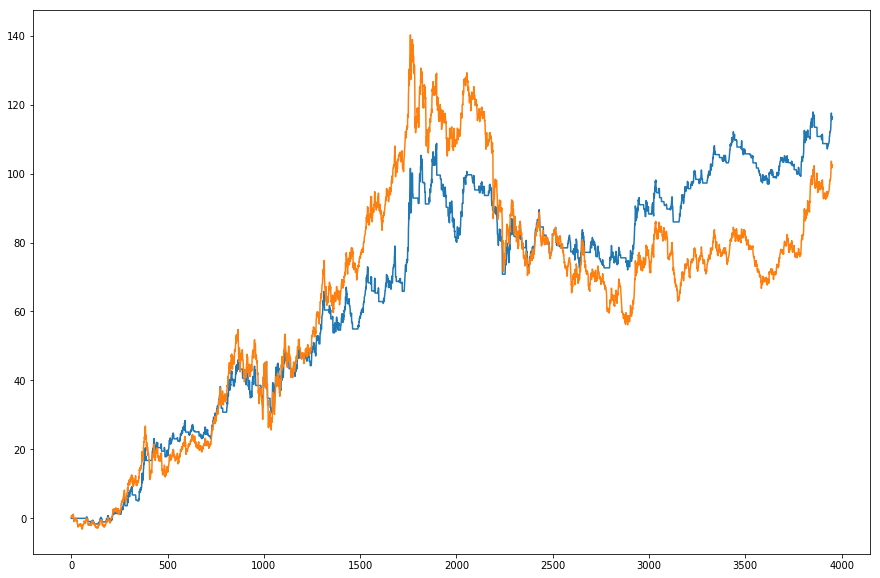

In [359]:
emas = [msft['close'] - ta.EMA(msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=30) for ema in emas]
s = [result[1][np.argmax(result[0])] for result in results]

performance = s[4].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

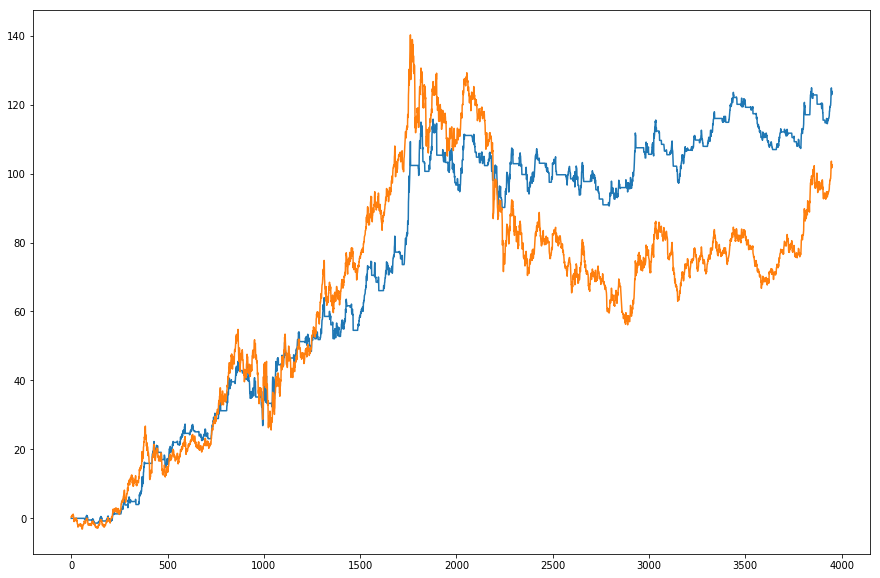

In [361]:
emas = [ta.CCI(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=30) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]

performance = ss[3].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

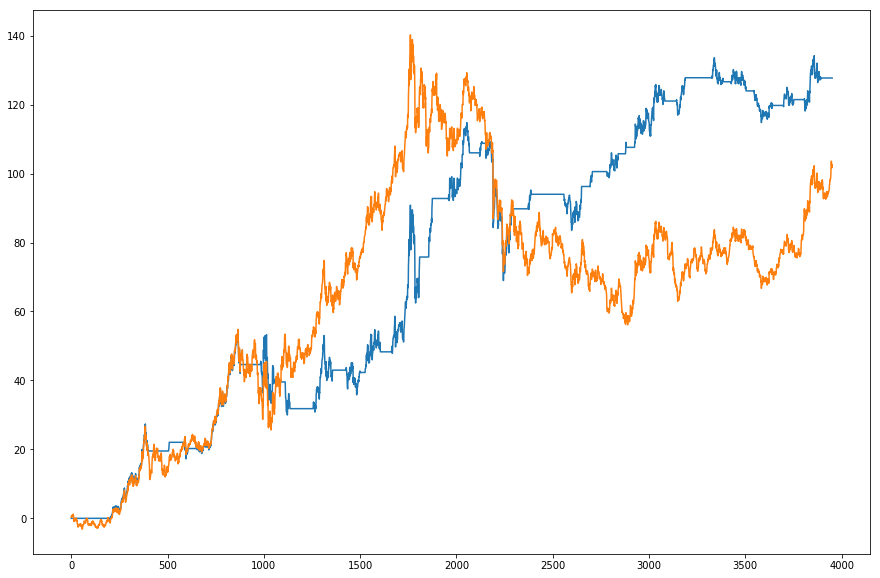

In [448]:
emas = [ta.ADX(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]

performance = ss[4].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

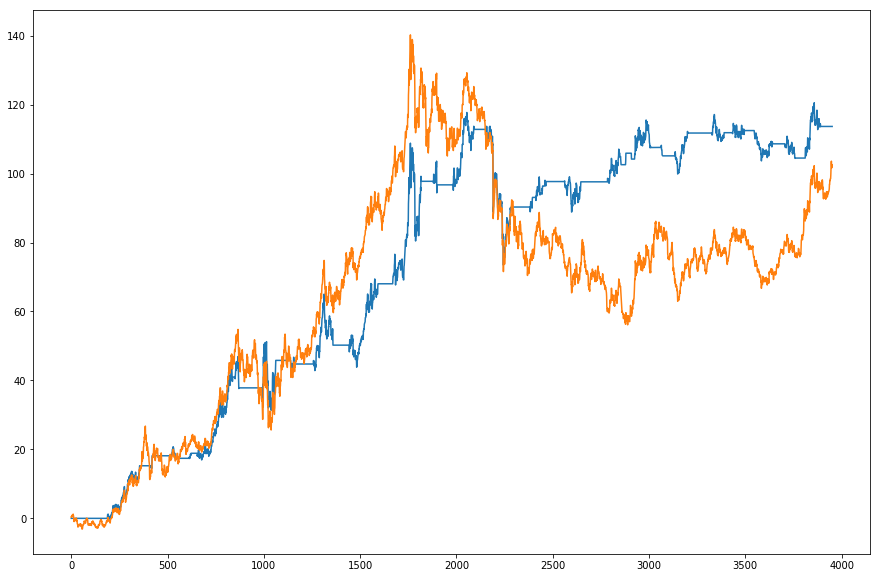

In [374]:
emas = [ta.ADXR(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]

performance = ss[2].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

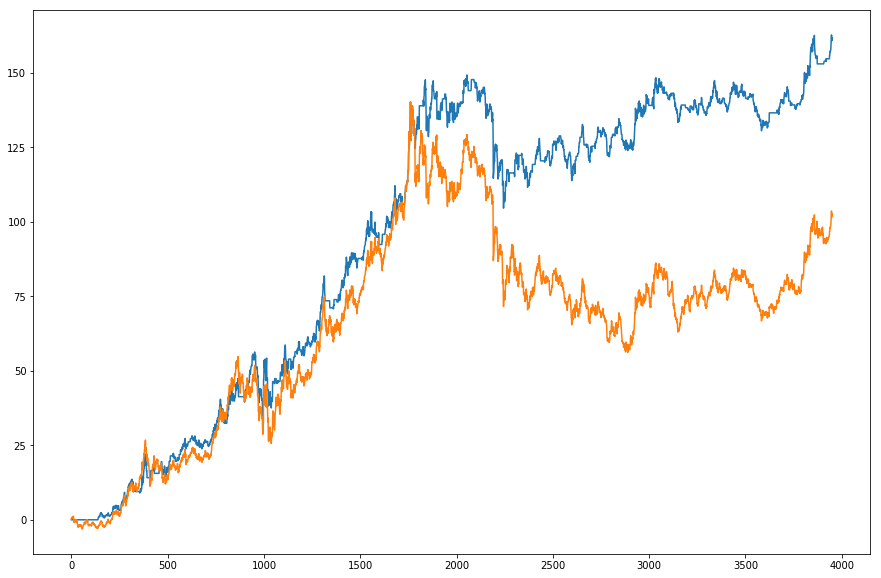

In [375]:
emas = [ta.DX(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[3].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

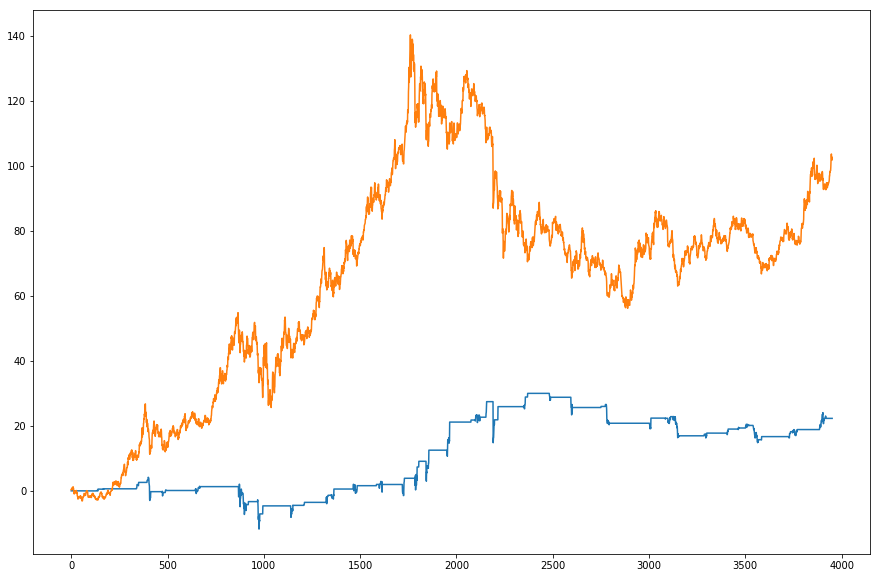

In [436]:
emas = [ta.MINUS_DI(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[2].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

In [426]:
emas = [msft['close'] - ta.EMA(msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]

In [427]:
c, v =  zip(*results)

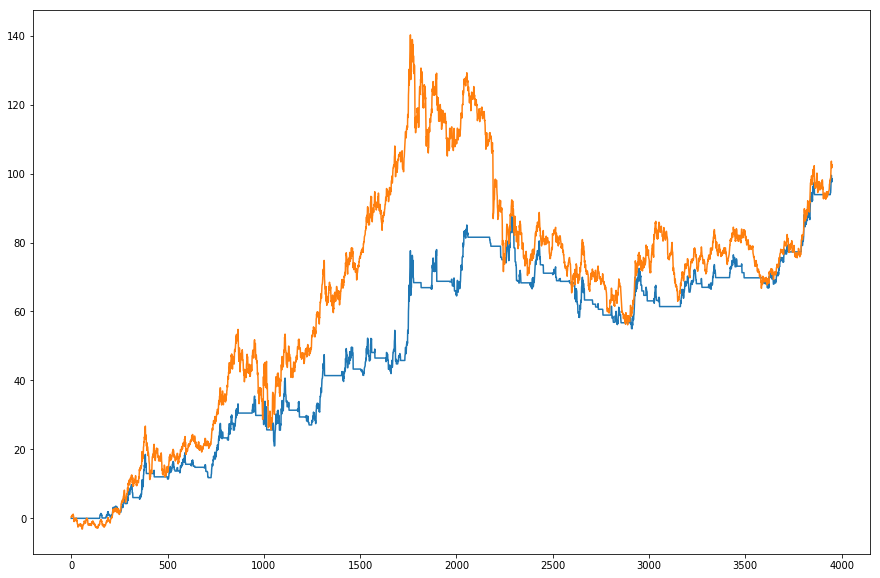

In [428]:
performance = __v[np.argmax(c)].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

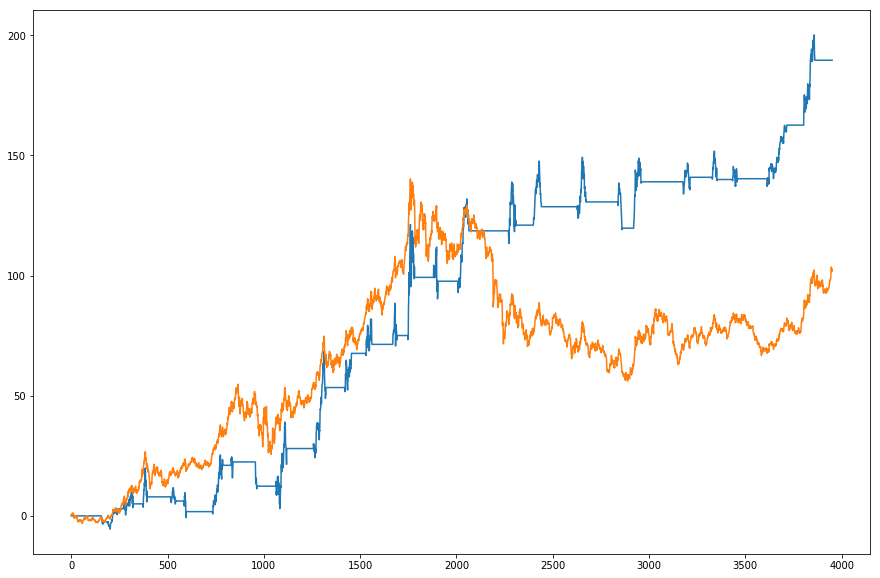

In [470]:
emas = [ta.TRIX(msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[1].astype(int) * msft['forward_returns'] * 2
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

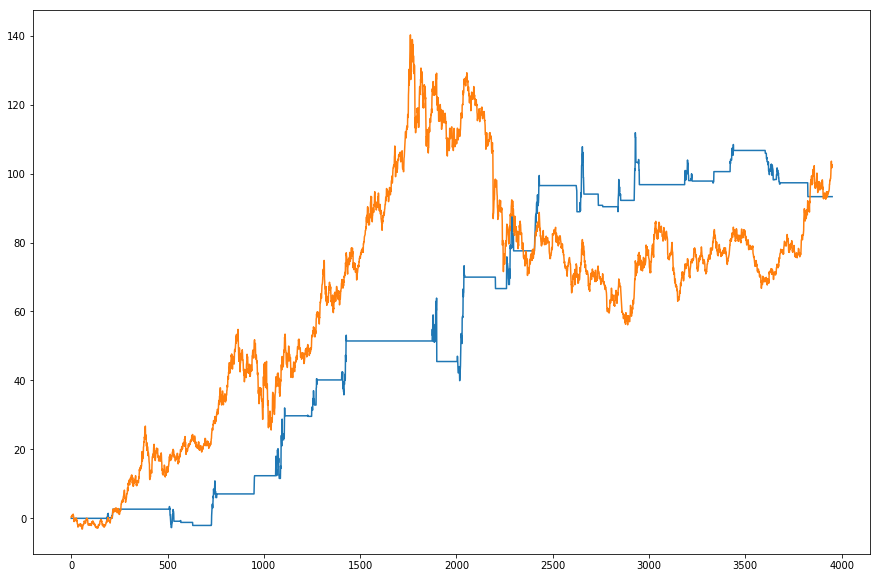

In [467]:
emas = [ta.WILLR(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[6].astype(int) * msft['forward_returns'] * 2
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

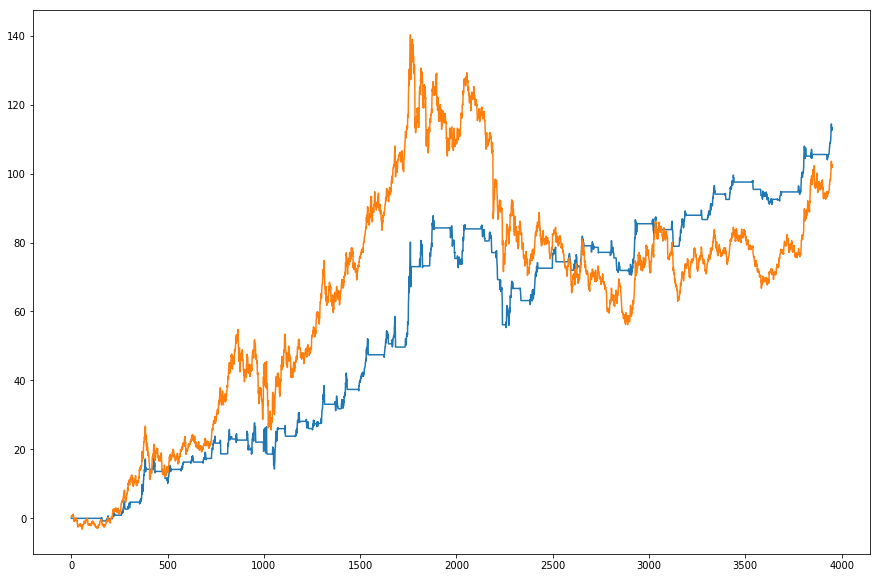

In [476]:
emas = [np.diff(ta.TRIX(msft['close'], timeperiod=10 + (i * 10)), prepend=0) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[1].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

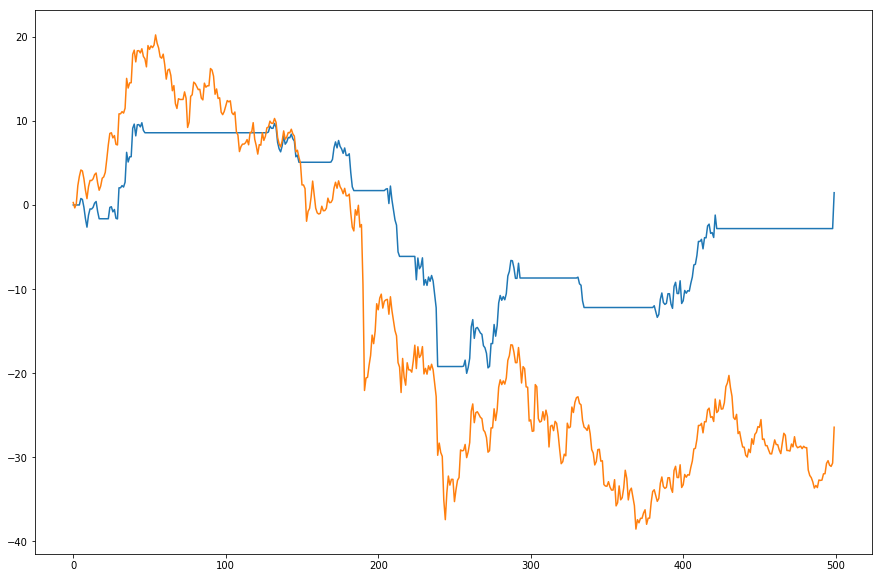

In [478]:
performance = ss[1].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance[2000:2500]))
plt.plot(np.cumsum(msft['forward_returns'][2000:2500]))

In [481]:
perfect_strategy = msft['forward_returns'] > 0